In [3]:
!pip3 install ultralytics
import os
import cv2
from ultralytics import YOLO
import datetime
from google.colab.patches import cv2_imshow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 66.2 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.



0: 416x640 5 air conditionings, 1 beach hut, 1 building, 1 can, 1 house exterior, 2 street lights, 1 telegraph pole, 19.0ms
Speed: 2.5ms preprocess, 19.0ms inference, 5.9ms postprocess per image at shape (1, 3, 416, 640)


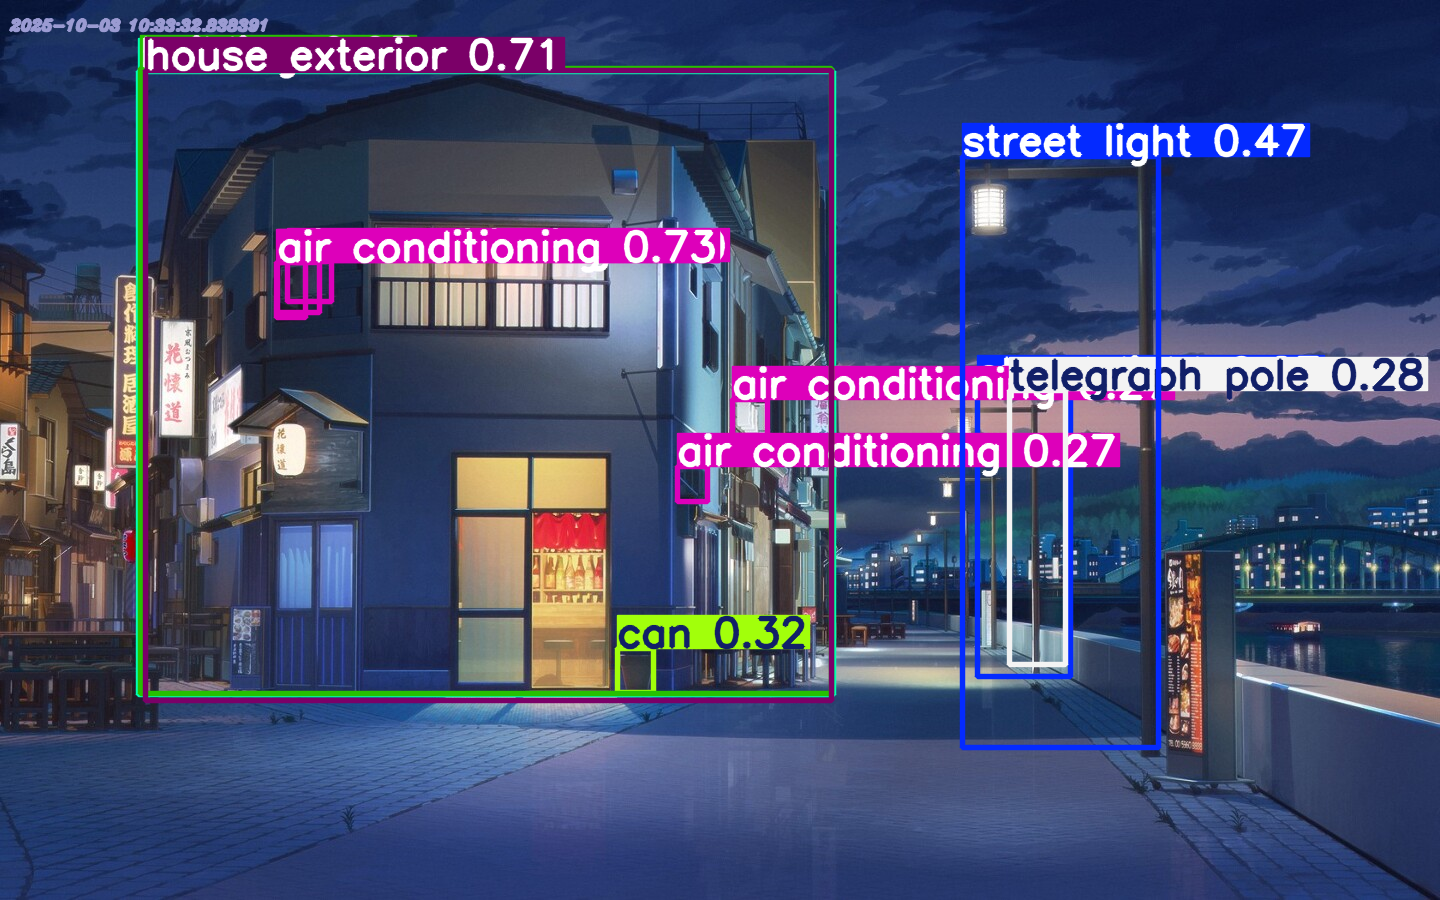



Class Name           Count
--------------------------
Air Conditioning         5
House Exterior           1
Building                 1
Street Light             2
Can                      1
Telegraph Pole           1
Beach Hut                1


In [19]:
#names=["African", "American", "Indian"]
# Loading The YOLO Model (Make Sure This Weights File Name Matches Your Library)
obj_list={}
model = YOLO('yoloe-11s-seg-pf.pt')  # Use yolov8n.pt Or Any Valid Ultralytics Weight

# Loading the Image
image_path = '/content/1440x900-453058-city-night-house-Japan-anime.jpg'  # Replace with your image filename or full path
image = cv2.imread(image_path)

if image is None:
    #cv2.imread() Function Returns 'None' If The Image Is Unavailable In Specified Path or Issue Reading Due To Unsupported Format Or Corrupted File
    print(f"Error: Could not load image '{image_path}'")
else:
    # Running Prediction On The Image
    results = model(image)

    # Annotate The Image With Bounding Boxes
    annotated_image = results[0].plot(masks = False, boxes= True)

    # Add Current Date/Time To The Image
    font = cv2.FONT_HERSHEY_SCRIPT_COMPLEX
    dt = str(datetime.datetime.now())
    cv2.putText(annotated_image, dt, (10, 30), font, 0.5, (210, 155, 155), 2, cv2.LINE_AA)

    # Displaying The Annotated Image
    cv2_imshow(annotated_image)

    # Count And List The Detected Objects And their Occurences
    for res in results:
      for count in res.boxes.cls:
        class_name = model.names[int(count)]
        if class_name in obj_list:
          obj_list[class_name] += 1
        else:
          obj_list[class_name] = 1

print("\n")
print(f'{"Class Name":20} {"Count":5}')
print("-" * 26)

for key_val in obj_list:
  obj_label = key_val.title()
  print(f'{obj_label:20} {obj_list[key_val]:5}')
